# Práctica 4 de IA
### Nmbres:
#### Daniel Tijerina Gonzáles
#### Suemy Inagaki Pinheiro Fagundes
#### Pareja 6

## 3. Predicción de fugas de clientes en una compañía telefónica

Una compañía telefónica está interesada en que desarrollemos un modelo que prediga los **100 clientes actuales** (dataset de explotaación) que tienen más probabilidad de abandonar la compañía. Para ello nos proporcionan una base de datos **fuga_clientes_empresa_telefonica_construccion.csv** con casos etiquetados, que usaremos para construir nuestro modelo de predicción.

Los campos de esta base de datos son:

* **Customer ID**

* **network_age**: antigüedad del cliente en días

* **Customer tenure in months:** antigüedad del cliente en meses

* **Total Spend in Months 1 and 2:** gasto total del cliente en los meses de referencia 1 y 2

* **Total SMS Spend:** gasto total en SMS

* **Total Data Spend:** gasto total en datos/internet

* **Total Data Consumption:** consumo total de datos (en KB) durante el período de estudio

* **Total Unique Calls:** número total de llamadas únicas

* **Total Onnet spend:** gasto total en llamadas a otros usuarios de la misma red de telefonía

* **Total Offnet spend:** gasto total en llamadas a otros usuarios de redes de telefonía diferentes

* **Total Call centre complaint calls:** número de llamadas de queja al call center

* **Network type subscription in Month 1:** suscripción de tipo de red en el mes 1. Esto indica la suscripción de red preferida de un cliente, lo que puede indicar su tipo de dispositivo: servicio 2G o 3G

* **Network type subscription in Month 2:** igual que el anterior pero en el mes posterior

* **Churn Status**: el valor es 1 si el cliente abandona la compañía telefónica, 0 si permanece en ella

* **Most Loved Competitor network in Month 1:** qué otro proveedor de la competencia prefiere el cliente en el mes 1. En realidad es un conjunto de columnas, cada una enfocada en un proveedor particular

* **Most Loved Competitor network in Month 2:** qué otro proveedor de la competencia prefiere el cliente en el mes 2. En realidad es un conjunto de columnas, cada una enfocada en un proveedor particular

La variable a predecir es **Churn Status**: el valor es 1 si el cliente **abandona** la compañía, 0 si no la abandona.

La compañía también nos proporciona otra base de datos, **fuga_clientes_empresa_telefonica_explotacion.csv**, con información sobre clientes de los que no se sabe ahora mismo si van a permanecer o no en la compañía. Por tanto en esta segunda base de datos todos los valores de la columna **Churn Status** son missing values (NaN).

La compañía nos pide que proporcionemos los IDs de los 100 clientes de la base de datos de explotación que con mayor probabilidad vayan a abandonar la compañía. Para ello proporcionaremos como entregable a la compañía un archivo csv con una sola columna, **Customer ID**, y 100 filas que contengan los IDs de los clientes seleccionados.

El fichero **ejemplo_fichero_predicciones.csv** contiene un ejemplo con el formato solicitado para este archivo.

In [243]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score 

In [244]:
datos_construccion = pd.read_csv("./fuga_clientes_empresa_telefonica_construccion.csv")
datos_explotacion  = pd.read_csv("./fuga_clientes_empresa_telefonica_explotacion.csv")

In [245]:
datos_construccion.head()

,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,...,Most Loved Competitor network in Month 1_ToCall,Most Loved Competitor network in Month 1_Uxaa,Most Loved Competitor network in Month 1_Weematel,Most Loved Competitor network in Month 1_Zintel,Most Loved Competitor network in Month 2_Mango,Most Loved Competitor network in Month 2_PQza,Most Loved Competitor network in Month 2_ToCall,Most Loved Competitor network in Month 2_Uxaa,Most Loved Competitor network in Month 2_Weematel,Most Loved Competitor network in Month 2_Zintel
0,ADF0039,123,4.10,76.7140,0.00,1.25,1.4951,14,564,6408,...,0,1,0,0,1,0,0,0,0,0
1,ADF0041,1316,43.87,98.8904,4.14,1.25,1.0244,27,1626,4373,...,0,1,0,0,1,0,0,0,0,0
2,ADF0051,2385,79.50,372.6300,3.51,1.25,6.0898,119,10411,22039,...,0,0,1,0,1,0,0,0,0,0
3,ADF0059,1614,53.80,530.2000,6.85,1.25,3.3447,69,6822,6274,...,0,0,0,0,1,0,0,0,0,0
4,ADF0060,2175,72.50,554.1300,6.99,153.75,673204.0342,33,3387,7241,...,0,0,1,0,1,0,0,0,0,0


In [246]:
datos_explotacion.columns

Index(['Customer ID', 'network_age', 'Customer tenure in month',
       'Total Spend in Months 1 and 2', 'Total SMS Spend', 'Total Data Spend',
       'Total Data Consumption', 'Total Unique Calls', 'Total Onnet spend',
       'Total Offnet spend', 'Total Call centre complaint calls',
       'Churn Status', 'Most Loved Competitor network in Month 1_0',
       'Most Loved Competitor network in Month 1_Mango',
       'Most Loved Competitor network in Month 1_PQza',
       'Most Loved Competitor network in Month 1_ToCall',
       'Most Loved Competitor network in Month 1_Uxaa',
       'Most Loved Competitor network in Month 1_Weematel',
       'Most Loved Competitor network in Month 1_Zintel',
       'Most Loved Competitor network in Month 2_Mango',
       'Most Loved Competitor network in Month 2_PQza',
       'Most Loved Competitor network in Month 2_ToCall',
       'Most Loved Competitor network in Month 2_Uxaa',
       'Most Loved Competitor network in Month 2_Weematel',
       'Most 

In [247]:
# chequeo de que las columnas son exactamente las mismas en los dos ficheros:

sum(datos_construccion.columns != datos_explotacion.columns)

0

In [248]:
# la columna a predecir es "Churn Status"
# si es 1, el cliente se va de la compañía
# si es 0, el cliente se queda

# Esta columna se sabe en el dataset de construcción (ejemplos de clientes pasados):
datos_construccion["Churn Status"].values[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [249]:
# Sin embargo no se sabe en el dataset de explotación (clientes actuales):
datos_explotacion["Churn Status"].values[:10]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

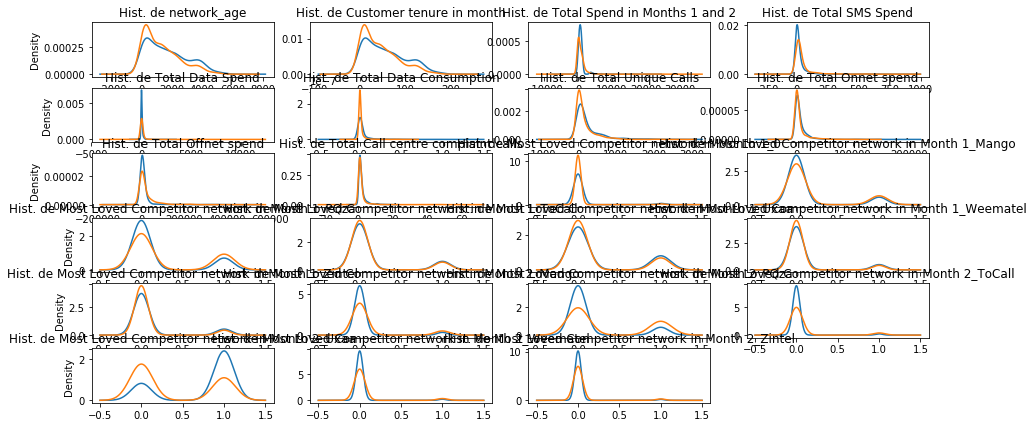

In [252]:
plt.figure(figsize=(15,7))
for i,n in enumerate(nombres_atrs):
    plt.subplot(6,4,i+1)
    aux = 'Density' if i%4==0 else ''
    datos_construccion.groupby("Churn Status")[n].plot(kind='kde', title='Hist. de '+n)
    plt.ylabel(aux);

# Evaluación de posibles modelos

Se evaluaran los modelos de sklearn vistos en 02-p4_IA. Naïve Bayes / árbol de decisión / knn/ regresión logística / red neuronal

In [274]:
# Se debe eliminar la columna 'Customer ID' antes de la modelacion
# Se elimina porque no aporta ningun valor a la prediccion

nombres_atrs = list(datos_construccion.columns)
nombres_atrs.remove('Churn Status')
nombres_atrs.remove('Customer ID')
print(nombres_atrs)
X = datos_construccion[nombres_atrs].values
y = datos_construccion['Churn Status'].values

['network_age', 'Customer tenure in month', 'Total Spend in Months 1 and 2', 'Total SMS Spend', 'Total Data Spend', 'Total Data Consumption', 'Total Unique Calls', 'Total Onnet spend', 'Total Offnet spend', 'Total Call centre complaint calls', 'Most Loved Competitor network in Month 1_0', 'Most Loved Competitor network in Month 1_Mango', 'Most Loved Competitor network in Month 1_PQza', 'Most Loved Competitor network in Month 1_ToCall', 'Most Loved Competitor network in Month 1_Uxaa', 'Most Loved Competitor network in Month 1_Weematel', 'Most Loved Competitor network in Month 1_Zintel', 'Most Loved Competitor network in Month 2_Mango', 'Most Loved Competitor network in Month 2_PQza', 'Most Loved Competitor network in Month 2_ToCall', 'Most Loved Competitor network in Month 2_Uxaa', 'Most Loved Competitor network in Month 2_Weematel', 'Most Loved Competitor network in Month 2_Zintel']


In [275]:
import warnings
warnings.filterwarnings('ignore')

clf_DT = DecisionTreeClassifier(max_depth=3)
clf_KNN = KNeighborsClassifier(n_neighbors=10)
clf_NB = GaussianNB()
clf_LR = LogisticRegression(solver='lbfgs')
clf_MLP = MLPClassifier(max_iter=400)

scores = cross_val_score(clf_DT, X, y, cv=5, error_score='raise')
print("Score global de DecisionTree: {:.2f} +/- {:.2f}".format(scores.mean(), scores.std()))

scores = cross_val_score(clf_KNN, X, y, cv=5, error_score='raise')
print("Score global de k-NN: {:.2f} +/- {:.2f}".format(scores.mean(), scores.std()))

scores = cross_val_score(clf_NB, X, y, cv=5, error_score='raise')
print("Score global de Naive Bayes Gaussiano: {:.2f} +/- {:.2f}".format(scores.mean(), scores.std()))

scores = cross_val_score(clf_LR, X, y, cv=5, error_score='raise')
print("Score global de Regresion Logística: {:.2f} +/- {:.2f}".format(scores.mean(), scores.std()))

scores = cross_val_score(clf_MLP, X, y, cv=5, error_score='raise')
print("Score global de redes neuronales: {:.2f} +/- {:.2f}".format(scores.mean(), scores.std()))

Score global de DecisionTree: 0.69 +/- 0.08
Score global de k-NN: 0.62 +/- 0.07
Score global de Naive Bayes Gaussiano: 0.62 +/- 0.02
Score global de Regresion Logística: 0.64 +/- 0.01
Score global de redes neuronales: 0.61 +/- 0.04


# El modelo con los mejores resultados fue el de árboles de decisión
Se usará ese modelo para predecir los valores de datos_explotacion

In [276]:
clf_DT.fit(X, y)
predictions = clf_DT.predict(X)

bien = mal = 0
for i,n in enumerate(predictions):
    if n == y[i]:
        bien += 1
    else:
        mal += 1
        
print(bien, mal)
print(bien / 1110)

887 223
0.7990990990990992


In [277]:
ids = datos_explotacion["Customer ID"].values
X_exp = datos_explotacion[nombres_atrs].values

In [278]:
predictions = clf_DT.predict(X_exp)

si = no = 0
for i,n in enumerate(predictions):
    if n == 1:
        si += 1
    else:
        no += 1
        
print(si, no)

103 186


El modelo predice que 103 de los 289 casos en datos_explotacion abandonaran la compañia

In [279]:
# Las operaciones de pandas y sklearn no modifican los indices
# Podemos solo concatenar los ids a las predicciones
results = {'Customer ID': ids,
           'Prediction': predictions}

results_df = pd.DataFrame(results, columns = ['Customer ID','Prediction'])

In [280]:
results_df = results_df[results_df['Prediction']==1][['Customer ID']]
results_df.head()

,Customer ID
30,ADF1560
31,ADF1561
33,ADF1563
34,ADF1564
35,ADF1567


In [233]:
# Se escriben los valores de las predicciones en un fichero .csv (ignorando los indices de pandas)
results_df.to_csv('results_p4_INTART.csv', index=False)